In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [3]:
data = pd.read_csv('data.csv', sep = '\t', delimiter = None)

data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [4]:
# duplicate data
data_1 = data.copy()
# Remove major
data_1 = data_1.drop(['major', 'country', 'uniquenetworklocation', 'source'],axis=1)
# Remove time and position
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1 = data_1.drop(position,axis=1)
data_1 = data_1.drop(time,axis=1)
# remove introelapse, testelapse, surveyelapse
data_1 = data_1.drop(data_1.iloc[:,42:45],axis=1)
data_2 = data_1.copy()
# Remove VCL
data_2 = data_2.drop(data_2.iloc[:,52:68],axis=1)
data_2 = data_2.replace(to_replace=0,value=3)
# Rename Ten Item Personlaity code
data_2 = data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})
print('Shape',data_1.shape)
print('Attributes',data_1.columns)
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 81)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1',
       'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'screensize', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize'],
      dtype='object')
Shape (39775, 65)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',

In [5]:
# Grouping age
def condition(x):
    if x <= 10:
        return 'Under Age'
    if  10 <= x <= 16:
        return 'Children'
    if 17 <= x <= 21:
        return 'Teen'
    if 21 <= x <= 35:
        return 'Adults'
    if 36 <= x <= 48:
        return 'Elder Adults'
    if x >= 49:
        return 'Older People'

data_2['AgeGroups'] = data_2['age'].apply(condition)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,4,4,2,4,4,4,4,4,2,1,...,16,1,1,12,1,10,2,1,2,Children
1,4,1,2,3,4,4,3,4,3,2,...,16,2,2,7,3,70,2,1,4,Children
2,3,1,4,1,4,3,1,3,2,4,...,17,2,1,4,3,60,1,1,3,Teen
3,2,3,2,1,3,3,4,2,3,3,...,13,2,2,4,5,70,2,1,5,Children
4,2,2,3,4,4,2,4,4,4,3,...,19,2,3,10,1,10,2,1,4,Teen


In [6]:
# Filter DAS
data_das = data_2.iloc[:,42:]
print('Attributes',data_das.columns)
data_3=data_2.filter(regex='Q\d{1,2}A')
print('Attributes',data_3.columns)
# data_3.head()

Attributes Index(['Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'hand', 'religion', 'orientation', 'race', 'voted',
       'married', 'familysize', 'AgeGroups'],
      dtype='object')
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A'],
      dtype='object')


In [7]:
# Categorized DAS
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3 = sub(data_3)
das_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
d = []
for i in das_keys["Depression"]:
    d.append('Q'+str(i)+'A')
s = []
for i in das_keys["Stress"]:
    s.append('Q'+str(i)+'A')
a = []
for i in das_keys["Anxiety"]:
    a.append('Q'+str(i)+'A')
depression = data_3.filter(d)
stress = data_3.filter(s)
anxiety = data_3.filter(a)

In [8]:
# scoring system
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

In [9]:
#Dass Specification
# DAS set
display(depression.head(), stress.head(), anxiety.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40


In [10]:
DEPRESSION = pd.merge(depression, data_das, how='inner', left_index=True, right_index=True)
ANXIETY = pd.merge(anxiety, data_das, how='inner', left_index=True, right_index=True)
STRESS = pd.merge(stress, data_das, how='inner', left_index=True, right_index=True)

print('Attributes',DEPRESSION.columns)
display(DEPRESSION.head(), STRESS.head(), ANXIETY.head())

Attributes Index(['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A', 'Total_Count',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'hand', 'religion', 'orientation', 'race', 'voted',
       'married', 'familysize', 'AgeGroups'],
      dtype='object')


,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,1,3,0,3,3,2,0,3,3,3,...,16,1,1,12,1,10,2,1,2,Children
1,1,3,1,3,2,3,1,1,2,1,...,16,2,2,7,3,70,2,1,4,Children
2,3,3,3,3,3,3,3,3,0,3,...,17,2,1,4,3,60,1,1,3,Teen
3,1,2,2,0,1,2,0,0,1,2,...,13,2,2,4,5,70,2,1,5,Children
4,2,3,2,3,2,3,2,1,3,2,...,19,2,3,10,1,10,2,1,4,Teen


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,3,3,3,3,3,3,3,3,3,3,...,16,1,1,12,1,10,2,1,2,Children
1,3,3,3,1,1,3,1,2,2,2,...,16,2,2,7,3,70,2,1,4,Children
2,2,2,2,1,0,0,1,2,1,1,...,17,2,1,4,3,60,1,1,3,Teen
3,1,2,1,1,0,3,0,0,3,2,...,13,2,2,4,5,70,2,1,5,Children
4,1,1,3,1,3,3,3,2,1,1,...,19,2,3,10,1,10,2,1,4,Teen


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,3,3,3,1,3,2,2,3,3,2,...,16,1,1,12,1,10,2,1,2,Children
1,0,2,2,2,2,0,0,0,1,3,...,16,2,2,7,3,70,2,1,4,Children
2,0,0,0,1,3,1,0,1,1,0,...,17,2,1,4,3,60,1,1,3,Teen
3,2,0,3,2,1,0,1,0,0,0,...,13,2,2,4,5,70,2,1,5,Children
4,1,3,3,3,3,3,3,3,3,3,...,19,2,3,10,1,10,2,1,4,Teen


In [14]:
def depression_condition(x):
    if x <= 13:
        return 'Normal'
    # if  10 <= x <= 13:
    #     return 'Mild'
    if 14 <= x <= 20:
        return 'Moderate'
    # if 21 <= x <= 27:
    #     return 'Severe'
    if x >= 21:
        return 'Severe'

def anxiety_condition(x):
    if x <= 13:
        return 'Normal'
    # if  10 <= x <= 13:
    #     return 'Mild'
    if 14 <= x <= 20:
        return 'Moderate'
    # if 21 <= x <= 27:
    #     return 'Severe'
    if x >= 21:
        return 'Severe'

def stress_condition(x):
    if x <= 13:
        return 'Normal'
    # if  10 <= x <= 13:
    #     return 'Mild'
    if 14 <= x <= 20:
        return 'Moderate'
    # if 21 <= x <= 27:
    #     return 'Severe'
    if x >= 21:
        return 'Severe'

DEPRESSION['Condition'] = DEPRESSION['Total_Count'].apply(depression_condition)
ANXIETY['Condition'] = ANXIETY['Total_Count'].apply(anxiety_condition)
STRESS['Condition'] = STRESS['Total_Count'].apply(stress_condition)

display(DEPRESSION.head(), STRESS.head(), ANXIETY.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,1,12,1,10,2,1,2,Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,2,2,7,3,70,2,1,4,Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,2,1,4,3,60,1,1,3,Teen,Severe
3,1,2,2,0,1,2,0,0,1,2,...,2,2,4,5,70,2,1,5,Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,2,3,10,1,10,2,1,4,Teen,Severe


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,1,12,1,10,2,1,2,Children,Severe
1,3,3,3,1,1,3,1,2,2,2,...,2,2,7,3,70,2,1,4,Children,Severe
2,2,2,2,1,0,0,1,2,1,1,...,2,1,4,3,60,1,1,3,Teen,Moderate
3,1,2,1,1,0,3,0,0,3,2,...,2,2,4,5,70,2,1,5,Children,Moderate
4,1,1,3,1,3,3,3,2,1,1,...,2,3,10,1,10,2,1,4,Teen,Severe


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,1,12,1,10,2,1,2,Children,Severe
1,0,2,2,2,2,0,0,0,1,3,...,2,2,7,3,70,2,1,4,Children,Moderate
2,0,0,0,1,3,1,0,1,1,0,...,2,1,4,3,60,1,1,3,Teen,Normal
3,2,0,3,2,1,0,1,0,0,0,...,2,2,4,5,70,2,1,5,Children,Moderate
4,1,3,3,3,3,3,3,3,3,3,...,2,3,10,1,10,2,1,4,Teen,Severe


In [15]:
# Simplified variable
data_depression=DEPRESSION.copy()
data_anxiety=ANXIETY.copy()
data_stress=STRESS.copy()

def depression_value(x):
    if x <= 13:
        return '0'
    # if  10 <= x <= 13:
    #     return 1
    # if 14 <= x <= 20:
    #     return 2
    # if 21 <= x <= 27:
    #     return 3
    # if x > 28:
    #     return 4
    if 14 <= x <= 20:
        return '1'
    if x >= 21:
        return '2'
def anxiety_value(x):
    if x <= 13:
        return '0'
    # if  10 <= x <= 13:
    #     return 1
    # if 14 <= x <= 20:
    #     return 2
    # if 21 <= x <= 27:
    #     return 3
    # if x > 28:
    #     return 4
    if 14 <= x <= 20:
        return '1'
    if x >= 21:
        return '2'

def stress_value(x):
    if x <= 13:
        return '0'
    # if  10 <= x <= 13:
    #     return 1
    # if 14 <= x <= 20:
    #     return 2
    # if 21 <= x <= 27:
    #     return 3
    # if x > 28:
    #     return 4
    if 14 <= x <= 20:
        return '1'
    if x >= 21:
        return '2'
        
def age_value(x):
    if x <= 10:
        return 0
    if  10 <= x <= 16:
        return 1
    if 17 <= x <= 21:
        return 2
    if 21 <= x <= 35:
        return 3
    if 36 <= x <= 48:
        return 4
    if x >= 49:
        return 5

data_depression['Condition'] = data_depression['Total_Count'].apply(depression_value)
data_depression['AgeGroups'] = data_depression['age'].apply(age_value)
data_depression = data_depression.drop(columns=['age','Total_Count'])

data_anxiety['Condition'] = data_anxiety['Total_Count'].apply(anxiety_value)
data_anxiety['AgeGroups'] = data_anxiety['age'].apply(age_value)
data_anxiety = data_anxiety.drop(columns=['age','Total_Count'])

data_stress['Condition'] = data_stress['Total_Count'].apply(stress_value)
data_stress['AgeGroups'] = data_stress['age'].apply(age_value)
data_stress = data_stress.drop(columns=['age','Total_Count'])

display(DEPRESSION.head(), STRESS.head(), ANXIETY.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,1,12,1,10,2,1,2,Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,2,2,7,3,70,2,1,4,Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,2,1,4,3,60,1,1,3,Teen,Severe
3,1,2,2,0,1,2,0,0,1,2,...,2,2,4,5,70,2,1,5,Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,2,3,10,1,10,2,1,4,Teen,Severe


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,1,12,1,10,2,1,2,Children,Severe
1,3,3,3,1,1,3,1,2,2,2,...,2,2,7,3,70,2,1,4,Children,Severe
2,2,2,2,1,0,0,1,2,1,1,...,2,1,4,3,60,1,1,3,Teen,Moderate
3,1,2,1,1,0,3,0,0,3,2,...,2,2,4,5,70,2,1,5,Children,Moderate
4,1,1,3,1,3,3,3,2,1,1,...,2,3,10,1,10,2,1,4,Teen,Severe


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,1,12,1,10,2,1,2,Children,Severe
1,0,2,2,2,2,0,0,0,1,3,...,2,2,7,3,70,2,1,4,Children,Moderate
2,0,0,0,1,3,1,0,1,1,0,...,2,1,4,3,60,1,1,3,Teen,Normal
3,2,0,3,2,1,0,1,0,0,0,...,2,2,4,5,70,2,1,5,Children,Moderate
4,1,3,3,3,3,3,3,3,3,3,...,2,3,10,1,10,2,1,4,Teen,Severe


d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'People Condition of Anxiety Level')

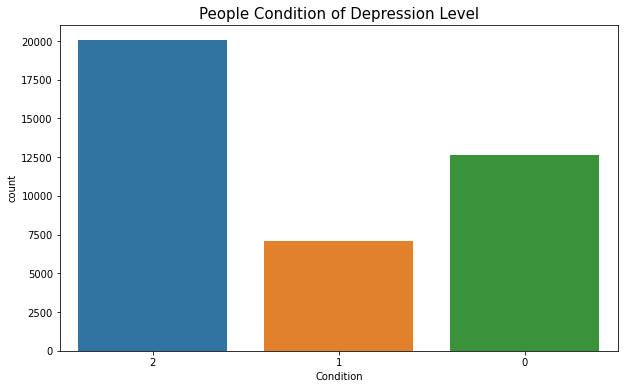

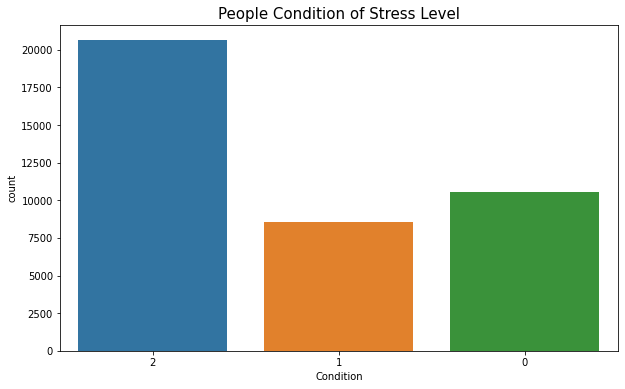

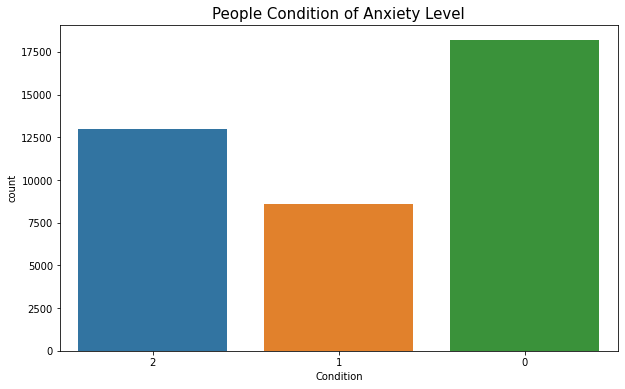

In [20]:
#Plot Depression
plt.figure(figsize=(10,6))
sns.countplot(data_depression.Condition)
plt.title('People Condition of Depression Level',fontsize=15)

#Plot Stress
plt.figure(figsize=(10,6))
sns.countplot(data_stress.Condition)
plt.title('People Condition of Stress Level',fontsize=15)

#Plot Anxiety
plt.figure(figsize=(10,6))
sns.countplot(data_anxiety.Condition)
plt.title('People Condition of Anxiety Level',fontsize=15)

# NEURAL NETWORK

In [21]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [22]:
X_Depression = data_depression.iloc[:,0:15].values
y_Depression = data_depression.iloc[:,16].values

X_Stress = data_stress.iloc[:,0:15].values
y_Stress = data_stress.iloc[:,16].values

X_Anxiety = data_anxiety.iloc[:,0:15].values
y_Anxiety = data_anxiety.iloc[:,16].values

print(X_Depression)
print(y_Depression)

[[1 3 0 ... 1 3 1]
 [1 3 1 ... 1 1 6]
 [3 3 3 ... 3 3 2]
 ...
 [1 0 0 ... 0 0 6]
 [1 2 0 ... 1 2 1]
 [1 3 0 ... 3 3 6]]
[7 4 2 ... 7 5 3]


In [23]:
Y_Depression = pd.get_dummies(y_Depression).values
Y_Stress = pd.get_dummies(y_Stress).values
Y_Anxiety = pd.get_dummies(y_Anxiety).values

print(Y_Depression[0:6])
print(Y_Stress[0:6])
print(Y_Anxiety[0:6])

[[0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0]]
[[0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0]]
[[0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0]]


In [24]:
from sklearn.model_selection import train_test_split

X_train_depression, X_test_depression, y_train_depression, y_test_depression = train_test_split(X_Depression, Y_Depression, test_size=0.3, random_state=0)
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(X_Stress, Y_Stress, test_size=0.3, random_state=0)
X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(X_Anxiety, Y_Anxiety, test_size=0.3, random_state=0)

print(y_train_depression[0:5])
print(X_train_depression[0:5])

[[0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]]
[[0 2 1 2 1 2 2 1 2 1 2 3 3 2 4]
 [3 3 2 3 2 3 3 3 3 3 3 2 3 3 1]
 [2 2 3 3 3 3 3 3 3 2 2 0 3 3 4]
 [2 3 2 0 0 1 0 1 1 2 0 1 1 3 2]
 [1 2 2 3 2 3 2 1 3 2 3 2 2 3 3]]


In [35]:
#Depression Model
modelDepression = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=[15]),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(10, activation='softmax')
    # tf.keras.layers.Dense(10, activation='sigmoid')
  ])

# modelDepression.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# modelDepression.fit(X_train_depression, y_train_depression, batch_size=256, epochs=100)
modelDepression.summary()



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 256)               4096      
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dense_40 (Dense)            (None, 10)                1290      
                                                                 
Total params: 38,282
Trainable params: 38,282
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Stress Model
modelStress = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=[15]),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(10, activation='softmax')
    # tf.keras.layers.Dense(10, activation='sigmoid')
  ])

# modelStress.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# modelStress.fit(X_train_depression, y_train_depression, batch_size=256, epochs=100)
modelStress.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 256)               4096      
                                                                 
 dense_42 (Dense)            (None, 128)               32896     
                                                                 
 dense_43 (Dense)            (None, 10)                1290      
                                                                 
Total params: 38,282
Trainable params: 38,282
Non-trainable params: 0
_________________________________________________________________


In [37]:
#Anxiety Model
modelAnxiety = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=[15]),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(10, activation='softmax')
    # tf.keras.layers.Dense(10, activation='sigmoid')
  ])

# modelAnxiety.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# modelAnxiety.fit(X_train_depression, y_train_depression, batch_size=256, epochs=100)
modelAnxiety.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 256)               4096      
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dense_46 (Dense)            (None, 10)                1290      
                                                                 
Total params: 38,282
Trainable params: 38,282
Non-trainable params: 0
_________________________________________________________________


In [38]:
modelDepression.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

historydep = modelDepression.fit(X_train_depression, y_train_depression, batch_size=256, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "d:\Python\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "d:\Python\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Python\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "d:\Python\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\Python\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "d:\Python\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\Python\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "d:\Python\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\Python\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "d:\Python\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 7) and (None, 10) are incompatible


In [ ]:
lossDepression, accuracyDepression = modelDepression.evaluate(X_test_depression, y_test_depression, verbose=0)
lossStress, accuracyStress = modelStress.evaluate(X_test_stress, y_test_stress, verbose=0)
lossAnxiety, accuracyAnxiety = modelAnxiety.evaluate(X_test_anxiety, y_test_anxiety, verbose=0)

print('Test loss Depression:', lossDepression)
print('Test accuracy Depression:', accuracyDepression)
print('---------------')
print('Test loss Stress:', lossStress)
print('Test accuracy Stress:', accuracyStress)
print('---------------')
print('Test loss Anxiety:', lossAnxiety)
print('Test accuracy Anxiety:', accuracyAnxiety)
print('---------------')

modelDepression.summary()